# Running *species*

This tutorial shows what a typical workflow with *species* looks like. The colors and magnitudes of a few directly imaged objects are compared with the field dwarfs from the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html).

## Initiating *species*

We start by importing the *species* toolkit.

In [1]:
import species

Next, the configuration file (*species_config.ini*) is read from the working folder. Since the file does not exist, it is created with default values for the path of the HDF5 database and the location where the external data is stored. The database and data folder are also created since this is the first time that we run *species* with the current configuration file. 

In [2]:
species.SpeciesInit()

Initiating species v0.3.1... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials


## Adding a photometric library

A `Database` object is now created which can be used for importing data from the chosen data folder into the database.

In [3]:
database = species.Database()

The photometry and parallaxes from the Database of Ultracool Parallaxes are downloaded and added to the database.

In [4]:
database.add_photometry('vlm-plx')

Adding Database of Ultracool Parallaxes... [DONE]


## Adding companion data

The distance and magnitudes of 51 Eri b, beta Pic b, and PZ Tel B are added to the database. This will automatically download the filter transmission profiles and a flux calibrated spectrum of Vega. These are required for the flux calibration of the magnitudes.

In [5]:
database.add_companion('51 Eri b')
database.add_companion('beta Pic b')
database.add_companion('PZ Tel B')

Adding object: 51 Eri b
   - Distance (pc) = 29.78 +/- 0.12
   - MKO/NSFCam.J:
      - Apparent magnitude = 19.04 +/- 0.40
      - Flux (W m-2 um-1) = 7.52e-17 +/- 2.83e-17
   - MKO/NSFCam.H:
      - Apparent magnitude = 18.99 +/- 0.21
      - Flux (W m-2 um-1) = 3.12e-17 +/- 6.07e-18
   - MKO/NSFCam.K:
      - Apparent magnitude = 18.67 +/- 0.19
      - Flux (W m-2 um-1) = 1.42e-17 +/- 2.49e-18
   - Paranal/SPHERE.IRDIS_B_H:
      - Apparent magnitude = 19.45 +/- 0.29
      - Flux (W m-2 um-1) = 2.06e-17 +/- 5.57e-18
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 18.41 +/- 0.26
      - Flux (W m-2 um-1) = 5.66e-17 +/- 1.37e-17
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 17.55 +/- 0.14
      - Flux (W m-2 um-1) = 4.64e-17 +/- 6.00e-18
   - Keck/NIRC2.Lp:
      - Apparent magnitude = 16.20 +/- 0.11
      - Flux (W m-2 um-1) = 1.79e-17 +/- 1.81e-18
   - Keck/NIRC2.Ms:
      - Apparent magnitude = 16.10 +/- 0.50
      - Flux (W m-2 um-1) = 8.47e-18 +/-

## Reading color-magnitude data

The colors and magnitudes are read from the database by first creating an object of `ReadColorMagnitude`.

In [6]:
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.H'),
                                      filter_mag='MKO/NSFCam.J')

The data is read by selecting the object type of the isolated brown dwarfs.

In [7]:
colorbox = colormag.get_color_magnitude(object_type='field')

A list of directly imaged objects is created with the filter names for the colors and magnitudes.

In [8]:
objects = [('51 Eri b', 'MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.J'),
           ('beta Pic b', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J'),
           ('PZ Tel B', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')]

## Plotting a color-magnitude diagram

The `ColorMagBox` object is provided in a list to `plot_color_magnitude`. The list with directly imaged objects are also included.

In [9]:
species.plot_color_magnitude(boxes=[colorbox, ],
                             objects=objects,
                             label_x='J - H [mag]',
                             label_y='M$_\mathregular{J}$ [mag]',
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             legend=None,
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


Let's have a look at the result. The plot is stored in the working folder. The discrete colorbar shows the spectral types of the field dwarfs and the directly imaged objects are labeled individually.

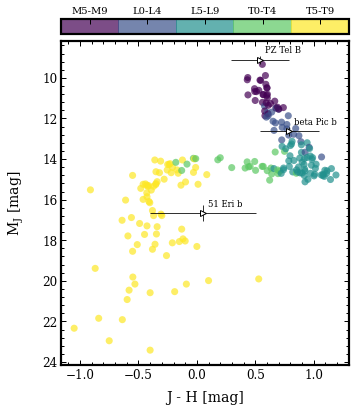

In [10]:
from IPython.display import Image
Image('color_mag.png')